# Finite Difference Schemes for 1D Heat Equation

PDE:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, \quad x\in [0,L],\ t>0
$$

Grid and notation: $x_i = i\,\Delta x \ (i=0,\dots,N)$, $t^n = n\,\Delta t \ (n=0,1,\dots)$, $u_i^n \approx u(x_i,t^n)$, $r = \alpha\,\dfrac{\Delta t}{(\Delta x)^2}$.

### Initial Condition  

We choose a sinusoidal profile:  

$$
u(x,0) = \sin\!\left(\frac{m \pi x}{L}\right), \quad m=1,2,\dots
$$  

This automatically satisfies **Dirichlet boundary conditions**:  

$$
u(0,t) = 0, \quad u(L,t) = 0 \quad \text{for all } t.
$$  




### Exact Solution (for validation)  

For this sinusoidal initial condition, the analytical solution of the heat equation is:  

$$
u(x,t) = \sin\!\left(\frac{m \pi x}{L}\right) \, 
\exp\!\left(-\alpha \left(\frac{m \pi}{L}\right)^2 t \right).
$$  

This exact solution can be used to check the accuracy of the numerical scheme.

---

Space discretization (central difference):

$$
\left.\frac{\partial^2 u}{\partial x^2}\right|_{i}^{n} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}
$$

---

## 1) Explicit (Forward Euler in time)

Time derivative: $\left.\frac{\partial u}{\partial t}\right|_{i}^{n} \approx \dfrac{u_i^{n+1}-u_i^{n}}{\Delta t}$, RHS at time $n$:

$$
u_i^{n+1} = u_i^{n} + r\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)
$$

Stability: $r \leq \tfrac{1}{2}$.

---



## 3) Crank–Nicolson (Trapezoidal in time)

Average RHS between $n$ and $n+1$:

$$
u_i^{n+1} - \frac{r}{2}\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right)
= u_i^{n} + \frac{r}{2}\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)
$$

Second-order accurate in time, unconditionally stable, requires solving a tridiagonal system.


## 2) Implicit (Backward Euler in time)

<!--Time derivative: $\left.\frac{\partial u}{\partial t}\right|_{i}^{n+1} \approx \dfrac{u_i^{n+1}-u_i^{n}}{\Delta t}$, RHS at time $n+1$:

$$
u_i^{n+1} - r\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) = u_i^{n}
$$

 Unconditionally stable (requires solving a tridiagonal system). -->

Time derivative:

$$
\left.\frac{\partial u}{\partial t}\right|_{i}^{n+1} \approx \frac{u_i^{n+1} - u_i^n}{\Delta t}.
$$

Space derivative (at new time level, $n+1$):

$$
\frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{(\Delta x)^2}.
$$

Full scheme:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} 
= \alpha \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{(\Delta x)^2}.
$$

Rearranging:

$$
- r u_{i-1}^{n+1} + (1 + 2r) u_i^{n+1} - r u_{i+1}^{n+1} = u_i^n.
$$

This is a **tridiagonal linear system**:

$$
A \, \mathbf{u}^{n+1} = \mathbf{u}^n,
$$

with

$$
A = 
\begin{bmatrix}
1+2r & -r    & 0     & \cdots & 0 \\
-r   & 1+2r  & -r    & \cdots & 0 \\
0    & -r    & 1+2r  & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & -r \\
0 & 0 & \cdots & -r & 1+2r
\end{bmatrix}.
$$


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Nx = 10
Nt = 1000-1
L = 1.0
T = 1.0
a = 1
hx = L/Nx
ht = T/Nt
r = (a*ht)/(hx*hx)
x = hx * np.arange(0,Nx+1,1)
m = 1
initial_condition = lambda x : np.sin((m * np.pi * x)/L)

ux0 = initial_condition(x)

#ux0 = list(ux0)
dim = len(ux0)
A = np.eye(dim)*(1.0+2.0*r)
A[np.arange(0,Nx,1),np.arange(1,Nx+1,1)] = - r #Filling upper diagonals
A[np.arange(1,Nx+1,1),np.arange(0,Nx,1)] = - r #Filling lower diagonals
A

array([[ 1.2002002, -0.1001001,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [-0.1001001,  1.2002002, -0.1001001,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       , -0.1001001,  1.2002002, -0.1001001,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , -0.1001001,  1.2002002, -0.1001001,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , -0.1001001,  1.2002002,
        -0.1001001,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       , -0.1001001,
         1.2002002, -0.1001001,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0

In [4]:
#np.linalg.inv(A)*
#ux0
uxt = np.dot(np.linalg.inv(A),ux0)

In [8]:
np.linalg.solve(A,ux0)

array([0.02570286, 0.30817729, 0.58226305, 0.801182  , 0.94182931,
       0.9902968 , 0.94182931, 0.801182  , 0.58226305, 0.30817729,
       0.02570286])

In [6]:
uxt

array([0.02570286, 0.30817729, 0.58226305, 0.801182  , 0.94182931,
       0.9902968 , 0.94182931, 0.801182  , 0.58226305, 0.30817729,
       0.02570286])

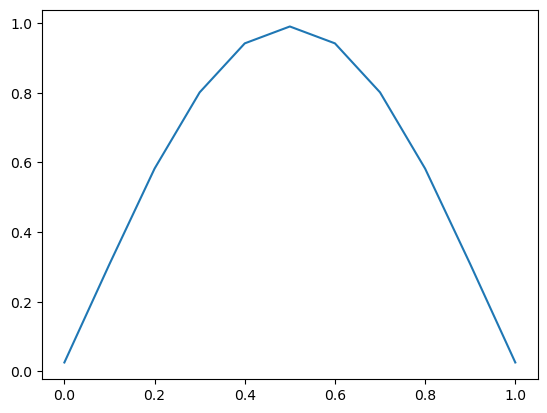

In [5]:
plt.plot(x,uxt)
plt.show()